In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 27.4 MB/s eta 0:00:00


## Importing Libraries

In [ ]:
import os
import numpy as np
import rasterio

### Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Mica

This version does not take CRS into account - use second set of functions below

In [ ]:
# from rasterio.enums import Resampling

# def resample_band(src, width, height):
#     data = src.read(1, out_shape=(height, width), resampling=Resampling.bilinear)
#     return data

# def stack_geotiffs(input_folder, output_file, width=None, height=None):
#     tiff_files = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith(".tif")]

#     with rasterio.open(tiff_files[0]) as src:
#         meta = src.meta

#         if width is None or height is None:
#             height, width = src.shape
#         else:
#             height, width = height, width

#     all_bands = np.zeros((len(tiff_files), height, width), dtype=np.uint16)

#     for i, tiff_file in enumerate(tiff_files):
#         with rasterio.open(tiff_file) as src:
#             all_bands[i] = resample_band(src, width, height)

#     meta.update({"count": len(tiff_files), "dtype": np.uint16})

#     with rasterio.open(output_file, "w", **meta) as dst:
#         for i, band in enumerate(all_bands, start=1):
#             dst.write(band, i)

with CRS

Writing stacking functions

In [ ]:
from rasterio.enums import Resampling


def resample_band(src, width, height):
    data = src.read(1, out_shape=(height, width), resampling=Resampling.bilinear)
    return data

def stack_geotiffs(input_folder, output_file, width=None, height=None):
    tiff_files = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith(".tif")]

    with rasterio.open(tiff_files[0]) as src:
        meta = src.meta

        if width is None or height is None:
            height, width = src.shape
        else:
            height, width = height, width

    all_bands = np.zeros((len(tiff_files), height, width), dtype=np.uint16)

    for i, tiff_file in enumerate(tiff_files):
        with rasterio.open(tiff_file) as src:
            all_bands[i] = resample_band(src, width, height)

    meta.update({"count": len(tiff_files), "dtype": np.uint16})

    # Set the CRS for the destination file using the 'crs' key in the meta dictionary
    meta['crs'] = src.crs

    with rasterio.open(output_file, "w", **meta) as dst:
        dst.write(all_bands)


## Wrangling Layers for Specific Stack

In [ ]:
import fnmatch

This code finds the keyword you're looking for under 'search_pattern'

In [ ]:
import os
import fnmatch

# Specify the folder directory where you want to search for files
folder_path = '/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands'

# Specify the pattern you want to search for (in this case, files containing 'high')
search_pattern = '*High*'

# Initialize an empty list to store the file paths
matching_files = []

# Iterate through all files in the folder and its subdirectories
for root, _, files in os.walk(folder_path):
    for filename in fnmatch.filter(files, search_pattern):
        # Append the full path of files that match the pattern to the list
        file_path = os.path.join(root, filename)
        matching_files.append(file_path)


# Print the list of matching file paths
print("Matching Files:")
for file_path in matching_files:
    print(file_path)


Matching Files:
/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob2.tif
/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob3.tif
/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob4.tif
/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob5.tif
/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob1.tif
/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_SWIR_Orthob2.tif
/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hi

##Here's a prototype of High or Mid

In [ ]:
import os
import fnmatch

# Specify the folder directory where you want to search for files
folder_path = '/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands'

# Specify the patterns you want to search for (files containing 'High' or 'Mid')
search_patterns = ['*High*', '*Mid*']

# Initialize an empty list to store the file paths
matching_files = []

# Iterate through all files in the folder and its subdirectories
for root, _, files in os.walk(folder_path):
    for pattern in search_patterns:
        for filename in fnmatch.filter(files, pattern):
            # Append the full path of files that match the pattern to the list
            file_path = os.path.join(root, filename)
            matching_files.append(file_path)

# Print the list of matching file paths
for file_path in matching_files:
    print("Found:", file_path)


Found: /content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob2.tif
Found: /content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob3.tif
Found: /content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob4.tif
Found: /content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob5.tif
Found: /content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob1.tif
Found: /content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_SWIR_Orthob2.tif
Found: /content/drive/MyDrive/7. SaltMUAS_shar

##Copying list of bands into new folder

In [ ]:
import shutil

In [ ]:
# # List of file paths for geotiffs
# matching_files = [
#     '/path/to/file1.tif',
#     '/path/to/file2.tif',
#     '/path/to/file3.tif',
#     # Add more file paths as needed
# ]

# Directory where you want to copy the files
output_folder = '/content/drive/MyDrive/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/Modeling_stack/Mid_High_tide_all_bands'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Copy each file to the output folder
for file_path in matching_files:
    file_name = os.path.basename(file_path)
    output_path = os.path.join(output_folder, file_name)
    shutil.copy(file_path, output_path)

print("Files copied successfully to folder.")


Files copied successfully to 'high_tide' folder.


In [16]:
print(file_path)
print(matching_files)

/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/20Jun22_OTH_Mid_Mica_Orthob5.tif
['/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob2.tif', '/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob3.tif', '/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob4.tif', '/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob5.tif', '/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/All_image_bands/19Aug22_OTH_High_Mica_Orthob1.tif', '/content/drive/MyDrive/7. SaltMUAS_share/UAS Data Collection/Old Town Hi

###STACKING

In [13]:
### Example usage:
input_folder = '/content/drive/MyDrive/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/Modeling_stack/Mid_High_tide_all_bands_stacked'
output_file = '/content/drive/MyDrive/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/Modeling_stack/Mid_High_tide_all_bands_stacked/Mid_High_stacked.tif'
width, height = None, None

stack_geotiffs(input_folder, output_file, width, height)
###

IndexError: ignored

In [17]:
# Example usage:
input_folder = '/content/drive/MyDrive/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/Modeling_stack/Mid_High_tide_all_bands'
output_file = '/content/drive/MyDrive/UAS Data Collection/Old Town Hill/OTH_Kate Processing Inputs/Modeling_stack/Mid_High_tide_all_bands_stacked/Mid_High_stacked.tif'
width, height = None, None

stack_geotiffs(input_folder, output_file, width, height)

## Check to see if output looks ok before downloading

In [18]:
from rasterio.plot import show

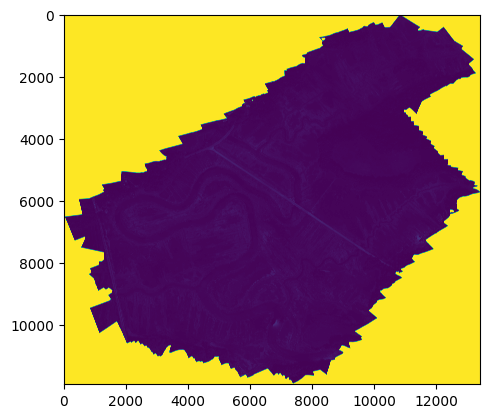

In [19]:
# Open the GeoTIFF file
with rasterio.open(output_file) as src:
    # Read the image data
    img_data = src.read(50)

    # Display the image
    show(img_data, cmap='viridis')

Double check crs

In [20]:
# Path to your GeoTIFF file
tiff_path = output_file

try:
    # Open the GeoTIFF file
    with rasterio.open(tiff_path) as src:
        # Get the CRS information
        crs = src.crs

        # Print the CRS information
        print("CRS: ", crs)

except Exception as e:
    print(f"An error occurred: {e}")

CRS:  EPSG:4326
